# Generating Learning Curves

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from average_forecast import load_data

import warnings
warnings.filterwarnings("ignore")

In [30]:
def load_data_refined(filename, wf_id):
    """
    Function loads data stored in the file filename and returns it as an numpy ndarray.
    """
    data = load_data(filename, 12, 12)[wf_id]
    return pd.DataFrame(data=data[:, 1:], index=range(len(data)))

## Generating the Learning Curves

The following two functions are used to generate the data required for a learning curve and to actually plot the curve itself. Note that learning_curve is a helper function used in plot_learning_curve.

In [31]:
def learning_curve(estimator, X, y, cv, train_sizes):
    train_error = []
    test_error = []
    avg_error = []
    
    for num_points in train_sizes:
        subset_x = X[:num_points]
        subset_y = y[:num_points]
        
        split_idx = int(0.7 * len(subset_x))
        
        train_x = subset_x.head(split_idx)
        train_y = subset_y.head(split_idx)
        test_x = subset_x.tail(len(X) - split_idx)
        test_y = subset_y.tail(len(y) - split_idx)
    
        estimator.fit(train_x, train_y)
        train_error.append(mean_squared_error(train_y, estimator.predict(train_x)))
        test_error.append(mean_squared_error(test_y, estimator.predict(test_x)))
        avg_error.append(mean_squared_error(subset_y, [0.0652541917269] * len(subset_y)))

    return train_sizes, train_error, test_error, avg_error

In [32]:
def plot_learning_curve(estimator, title, X, y, train_sizes, ylim=None, cv=None):
    """
    Plots the learning curve for the model. This function is taken predominantly from
    an sklearn example.
    """
    plt.figure(figsize=(12,5))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Number of Training Examples")
    plt.ylabel("Mean Squared Error")
    train_sizes, train_scores, test_scores, avg_scores = learning_curve(estimator, X, y, train_sizes=train_sizes, cv=cv)
    
    plt.grid()
    plt.plot(train_sizes, train_scores, 'o-', color="g", label="Training Error")
    plt.plot(train_sizes, test_scores, 'o-', color="b", label="Test Error")
#     plt.plot(train_sizes, avg_scores, 'o-', color="r", label="Error for Predicting Average")

    plt.legend(loc="best")
    return plt

## Main Code
Here is the code that actually uses the above functions and classes to generate the seven learning curves.

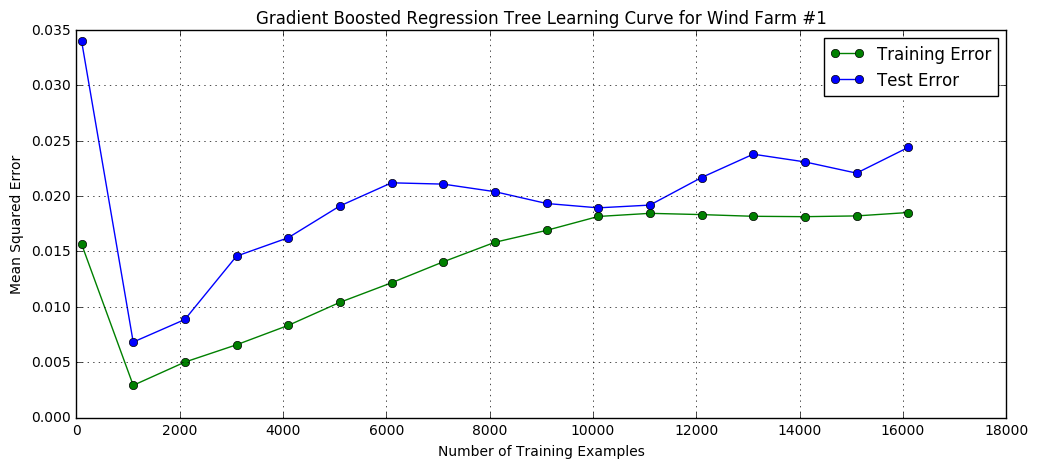

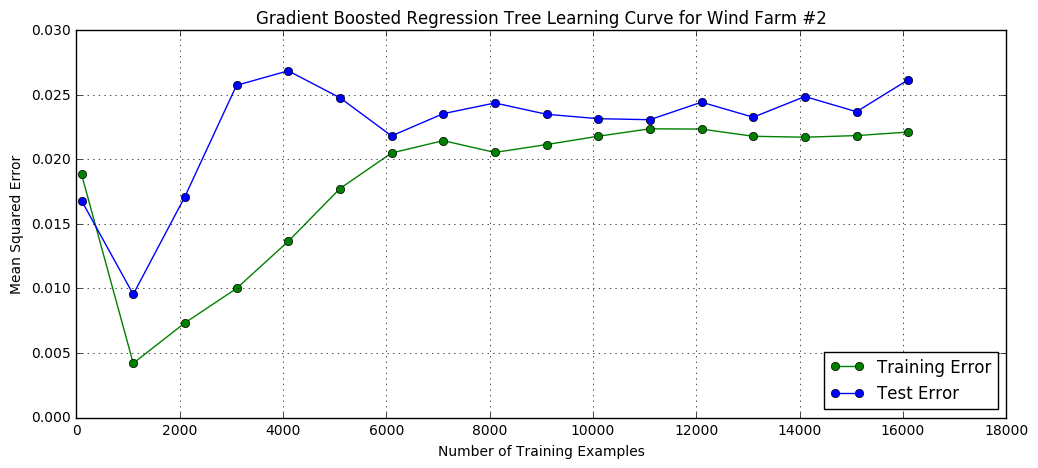

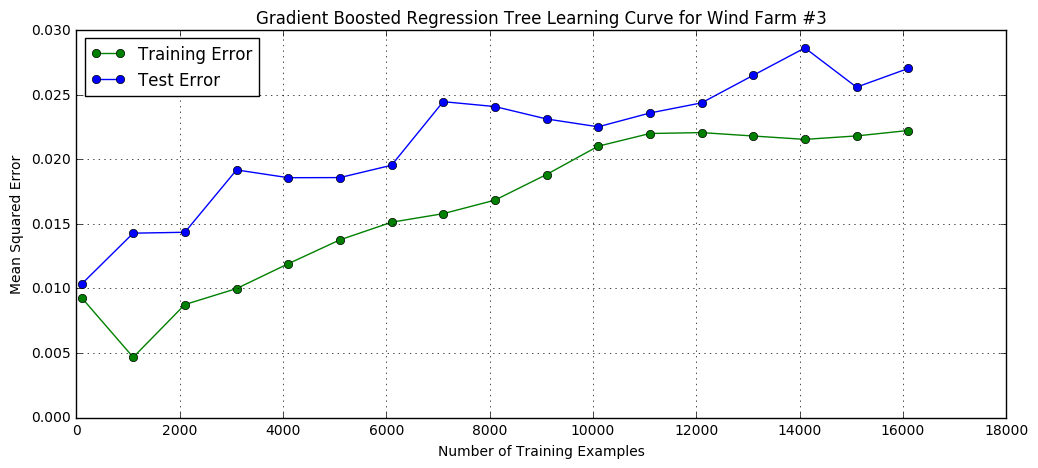

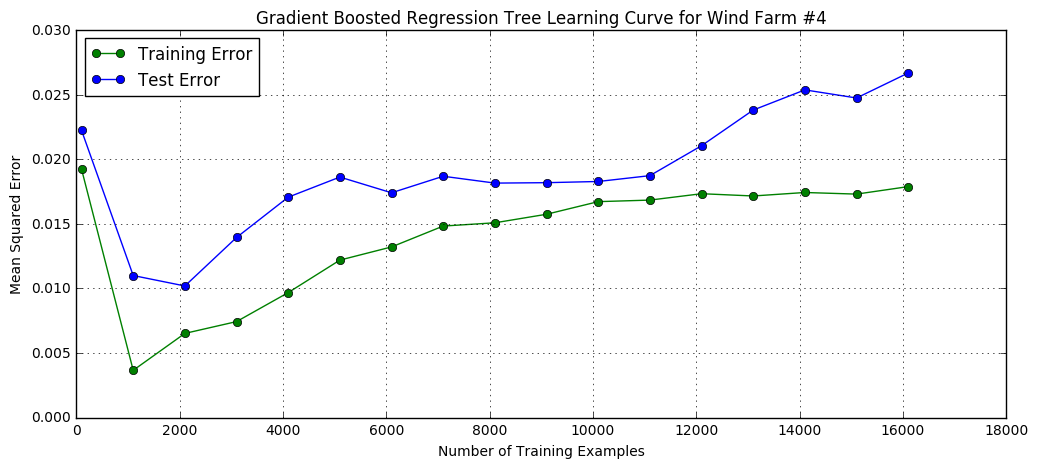

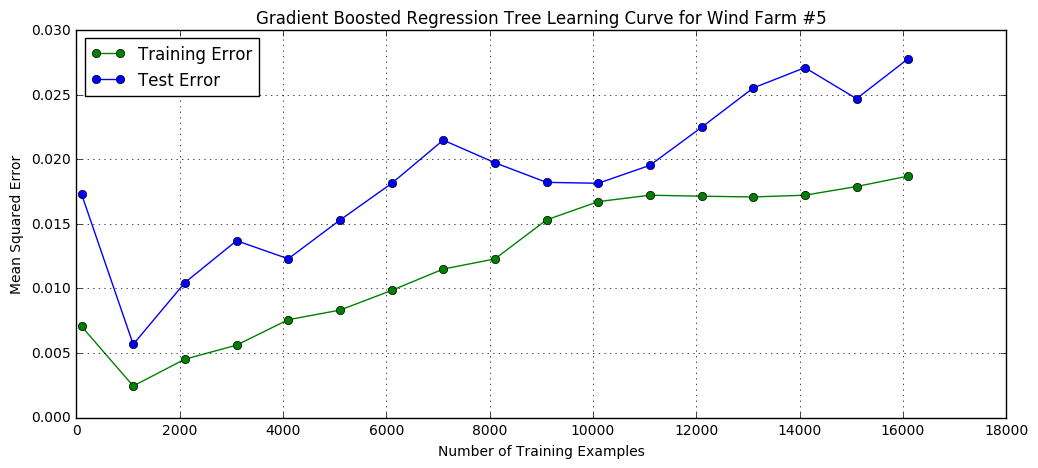

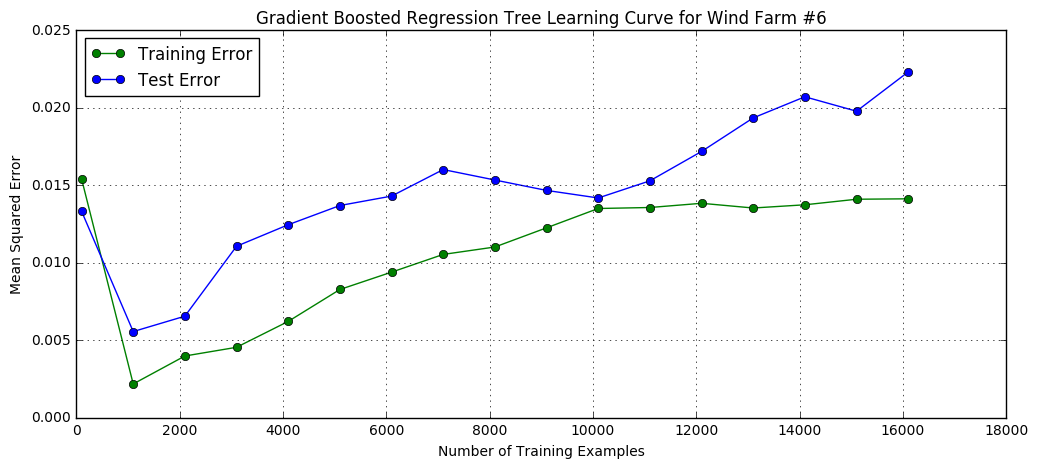

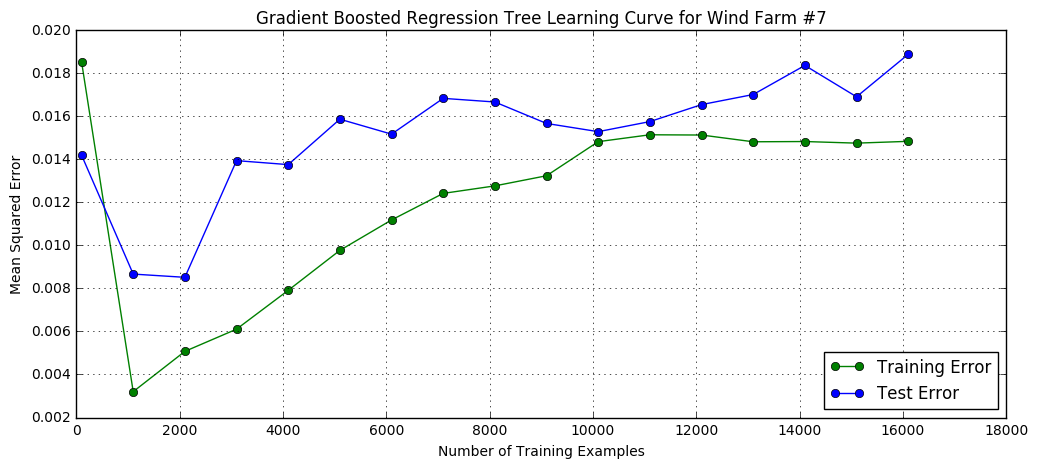

In [37]:
training_sizes = range(100, 17000, 1000)

for wf_id in range(1, 8):
    train_data = load_data_refined('../data/virtual_aggregate_data.csv', wf_id)
    features = range(len(train_data.columns) - 1)
    target = [len(train_data.columns) - 1]

    train_x = train_data[features]
    train_y = train_data[target]

    title = 'Gradient Boosted Regression Tree Learning Curve for Wind Farm #%i' %wf_id
    gbr = GradientBoostingRegressor(n_estimators=700, learning_rate=0.1, max_depth=2, random_state=0, min_samples_split=100, max_features='sqrt')
    plt = plot_learning_curve(gbr, title, train_x, train_y, ylim=None, cv=None, train_sizes=training_sizes)
    plt.show()